# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [10]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)
print(df)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [41]:
def alpha_func(D,idx): 
    alpha_values = []
    for i in idx: 
        row = D.loc [i]
        # print(row)
        width = D.loc[i,'Sepal.Width']
        # print(width)
        length = D.loc[i,'Sepal.Length']
        # print(length)
        alpha =  width/length
        # print(alpha) 
        alpha_values.append(alpha)
    return alpha_values
    alpha_series = pd.Series(alpha_values)
    return alpha_series

Test the code below

In [42]:
alpha_func(df, range(100))

[0.6862745098039216,
 0.6122448979591836,
 0.6808510638297872,
 0.673913043478261,
 0.72,
 0.7222222222222222,
 0.7391304347826088,
 0.6799999999999999,
 0.6590909090909091,
 0.6326530612244897,
 0.6851851851851851,
 0.7083333333333334,
 0.625,
 0.6976744186046512,
 0.6896551724137931,
 0.7719298245614036,
 0.7222222222222222,
 0.6862745098039216,
 0.6666666666666666,
 0.7450980392156863,
 0.6296296296296295,
 0.7254901960784315,
 0.782608695652174,
 0.6470588235294118,
 0.7083333333333334,
 0.6,
 0.6799999999999999,
 0.673076923076923,
 0.6538461538461539,
 0.6808510638297872,
 0.6458333333333334,
 0.6296296296296295,
 0.7884615384615383,
 0.7636363636363637,
 0.6326530612244897,
 0.64,
 0.6363636363636364,
 0.7346938775510203,
 0.6818181818181818,
 0.6666666666666667,
 0.7,
 0.5111111111111111,
 0.7272727272727273,
 0.7,
 0.7450980392156863,
 0.625,
 0.7450980392156863,
 0.6956521739130436,
 0.6981132075471699,
 0.6599999999999999,
 0.4571428571428572,
 0.5,
 0.4492753623188406,
 0.4

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [62]:
rng = np.random.default_rng()
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

[0.49180327868852464,
 0.5666666666666667,
 0.45,
 0.5357142857142857,
 0.7450980392156863,
 0.4901960784313726,
 0.6296296296296295,
 0.4117647058823529,
 0.7083333333333334,
 0.7391304347826088,
 0.48333333333333334,
 0.7222222222222222,
 0.3548387096774194,
 0.36507936507936506,
 0.39682539682539686,
 0.6599999999999999,
 0.4754098360655738,
 0.6538461538461539,
 0.7,
 0.6851851851851851,
 0.625,
 0.6470588235294118,
 0.6808510638297872,
 0.41818181818181815,
 0.44776119402985076,
 0.43636363636363634,
 0.44642857142857145,
 0.6956521739130436,
 0.6458333333333334,
 0.6799999999999999,
 0.4901960784313726,
 0.7719298245614036,
 0.7272727272727273,
 0.6,
 0.6808510638297872,
 0.48979591836734687,
 0.49180327868852464,
 0.44642857142857145,
 0.64,
 0.48333333333333334,
 0.6851851851851851,
 0.7083333333333334,
 0.7636363636363637,
 0.4393939393939394,
 0.4626865671641791,
 0.7083333333333334,
 0.5423728813559322,
 0.5666666666666667,
 0.45,
 0.673913043478261,
 0.6363636363636364,
 0.

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

because we are calculating the mean from a sample that might not be an actual representation of the true population due to variance.

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [95]:
np.random.seed(3)
def boot_SE(data, column, B):
    rng = np.random.default_rng()
    n = len(data)
    means_list = []
    for i in range(B):
        indices = rng.choice(n, size=n, replace=True)
        length_list =[]
        for j in indices:
            length_list.append(data.loc[j,column])
        length_mean = np.mean(length_list)
        means_list.append(length_mean)
    # means_total = np.mean(means_list)
    return means_list



_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [96]:
print(boot_SE(df, 'Sepal.Length', 1000))

mean_sepal_length = df['Sepal.Length'].mean()
print(mean_sepal_length)

[5.945999999999999, 5.74, 5.799333333333334, 5.852, 5.754, 5.843999999999999, 5.925333333333333, 5.917333333333333, 5.847333333333333, 5.922666666666667, 5.781333333333333, 5.831333333333333, 5.776666666666666, 5.876666666666668, 5.729333333333332, 5.774666666666667, 5.811999999999999, 5.903333333333333, 5.789333333333333, 5.8806666666666665, 5.819333333333333, 5.970666666666667, 5.807333333333334, 5.963333333333333, 5.924, 5.741333333333333, 5.762666666666667, 5.803333333333334, 5.754, 5.838666666666668, 5.924666666666667, 5.718666666666667, 5.702, 5.989999999999999, 5.793333333333333, 5.838, 5.841333333333334, 5.767333333333333, 5.902, 5.844666666666667, 5.891333333333334, 5.712666666666667, 5.792, 5.797999999999999, 5.784666666666667, 5.729333333333332, 5.852666666666667, 5.8966666666666665, 5.833333333333333, 5.942666666666668, 5.830666666666666, 5.777333333333334, 5.828, 5.878666666666667, 5.8213333333333335, 5.796666666666667, 5.839333333333333, 5.83, 5.913333333333333, 5.8266666

_(vi)_ What is the original mean value of `Sepal.Length`?

5.843333333333334

Next, let's look _inside_ our bootstrapping to understand the new, bootstrapped sample we have created. Let's review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value.

In [125]:
boot_se_samples = boot_SE(df, 'Sepal.Length', 1000)
t_range = np.ptp(boot_se_samples)
print(t_range)
bootstrapped_mean = np.mean(boot_se_samples)
bootstrapped_std = np.std(boot_se_samples)
mean_difference = bootstrapped_mean - mean_sepal_length

print(f"Original Mean: {mean_sepal_length}, Bootstrapped Mean: {bootstrapped_mean}, Bootstrapped Standard Deviation: {bootstrapped_std}, Difference: {mean_difference}")



0.44333333333333425
Original Mean: 5.843333333333334, Bootstrapped Mean: 5.845327333333333, Bootstrapped Standard Deviation: 0.06621024062786664, Difference: 0.001993999999998941


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris petal length. (Hint: use the `np.percentile` function)

In [105]:
confidence_interval = np.percentile(boot_se_samples, [2.5, 97.5])
print(confidence_interval)

[5.7053  5.97735]


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

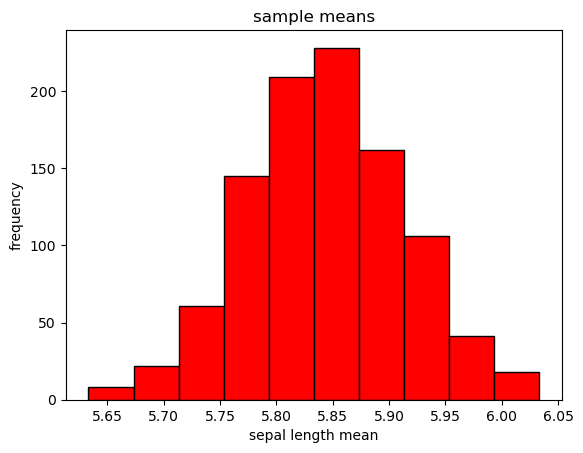

In [122]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
ax.hist(boot_se_samples,color='red', edgecolor='black')

# Add a title
ax.set_title('sample means')

# Add a label to the x-axis
ax.set_xlabel('sepal length mean')

# Add a label to the y-axis
ax.set_ylabel('frequency')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [128]:
'''
The estimated average length is approximately 5.85 units, 
with a 95% confidence interval ranging from 5.7053 to 5.97735 
for the bootstrapped sample mean. This bootstrapped mean aligns 
closely with the original mean of 5.84 units, suggesting that 
the distribution of bootstrapped sample means was centered around 
the original value
'''

'\nThe estimated average length is approximately 5.85 units, \nwith a 95% confidence interval ranging from 5.7053 to 5.97735 \nfor the bootstrapped sample mean. This bootstrapped mean aligns \nclosely with the original mean of 5.84 units, suggesting that \nthe distribution of bootstrapped sample means was centered around \nthe original value\n'

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
